In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import holoviews as hv
import geoviews as gv
import iris
import cartopy

from cartopy import crs
from cartopy import feature as cf
from geoviews import feature as gf

hv.notebook_extension('bokeh','matplotlib')
# %output backend='matplotlib'
# %opts Feature [projection=crs.Robinson()]



Start with NADA dataset

In [2]:
iris.FUTURE.netcdf_promote=True
iris_ensemble = iris.load_cube('/d4/yzhou/Drought_atlas/nada_hd.nc')
print iris_ensemble.summary()

pdsi / (1)                          (lon: 237; lat: 138; time: 2006)
     Dimension coordinates:
          lon                           x         -          -
          lat                           -         x          -
          time                          -         -          x


In [3]:
iris_dataset = gv.Dataset(iris_ensemble)

In [4]:
print repr(iris_dataset)

:Dataset   [lat,lon,time]   (pdsi)


In [5]:
iris_ensemble.metadata

CubeMetadata(standard_name=None, long_name=None, var_name=u'pdsi', units=Unit('1'), attributes={}, cell_methods=())

In [6]:
iris_ensemble.coord('time')

DimCoord(array([  0.00000000e+00,   1.00000000e+00,   2.00000000e+00, ...,
         2.00300000e+03,   2.00400000e+03,   2.00500000e+03]), standard_name='time', units=Unit('1'), var_name='time')

In [7]:
iris_ensemble.coord('lon')

DimCoord(array([-170.75, -170.25, -169.75, -169.25, -168.75, -168.25, -167.75,
       -167.25, -166.75, -166.25, -165.75, -165.25, -164.75, -164.25,
       -163.75, -163.25, -162.75, -162.25, -161.75, -161.25, -160.75,
       -160.25, -159.75, -159.25, -158.75, -158.25, -157.75, -157.25,
       -156.75, -156.25, -155.75, -155.25, -154.75, -154.25, -153.75,
       -153.25, -152.75, -152.25, -151.75, -151.25, -150.75, -150.25,
       -149.75, -149.25, -148.75, -148.25, -147.75, -147.25, -146.75,
       -146.25, -145.75, -145.25, -144.75, -144.25, -143.75, -143.25,
       -142.75, -142.25, -141.75, -141.25, -140.75, -140.25, -139.75,
       -139.25, -138.75, -138.25, -137.75, -137.25, -136.75, -136.25,
       -135.75, -135.25, -134.75, -134.25, -133.75, -133.25, -132.75,
       -132.25, -131.75, -131.25, -130.75, -130.25, -129.75, -129.25,
       -128.75, -128.25, -127.75, -127.25, -126.75, -126.25, -125.75,
       -125.25, -124.75, -124.25, -123.75, -123.25, -122.75, -122.25,
       -121

In [8]:
gv_image = iris_dataset.select(time=(2000,2005)).to(gv.Image, ['lon', 'lat'])

In [9]:
gv_image[2001:2002]

:HoloMap   [time]
   :Image   [lon,lat]   (pdsi)

In [10]:
from eofs.iris import Eof



In [11]:
iris_ensemble.transpose() # Transpose the data so that time is the first dimension. Otherwise eofs doesn't work

In [12]:
iris_ensemble.coord('lat').rename('latitude')

In [13]:
iris_ensemble.coord('lon').rename('longitude')

In [14]:
iris_ensemble.coord('longitude').guess_bounds()

In [15]:
iris_ensemble.coord('latitude').guess_bounds()

In [16]:
iris_ensemble.summary()

'pdsi / (1)                          (time: 2006; latitude: 138; longitude: 237)\n     Dimension coordinates:\n          time                           x               -               -\n          latitude                       -               x               -\n          longitude                      -               -               x'

In [17]:
nada_later_than_1000 = iris_ensemble.extract(iris.Constraint(time=range(1000,2005)))

In [18]:
# create a solver class, taking advantage of built-in weighting
solver = Eof(nada_later_than_1000)

# retrieve the first few EOFs from the solver class
eofs = solver.eofs(neofs=5)

In [19]:
eofs_dataset = gv.Dataset(eofs)

In [20]:
# %opts Image [colorbar=True]
%output size=150
eofs_to = eofs_dataset.to(gv.Image, ['longitude', 'latitude']) * gf.coastline()
eofs_to.layout()

:NdLayout   [eof_number]
   :Overlay
      .Empirical_orthogonal_functions.I :Image   [longitude,latitude]   (empirical_orthogonal_functions)
      .Coastline.I                      :Feature   [Longitude,Latitude]

Retrive principle component 1

In [21]:
pcs = solver.pcs(npcs=5, pcscaling=1)
pcs.transpose() # so hv.Curve plots correctly

In [22]:
hv.Curve(pcs[0]) + hv.Curve(pcs[1]) + hv.Curve(pcs[2]) + hv.Curve(pcs[3]) + hv.Curve(pcs[4])

:Layout
   .Principal_components.I   :Curve   [time]   (principal_components)
   .Principal_components.II  :Curve   [time]   (principal_components)
   .Principal_components.III :Curve   [time]   (principal_components)
   .Principal_components.IV  :Curve   [time]   (principal_components)
   .Principal_components.V   :Curve   [time]   (principal_components)

In [23]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 8.0)

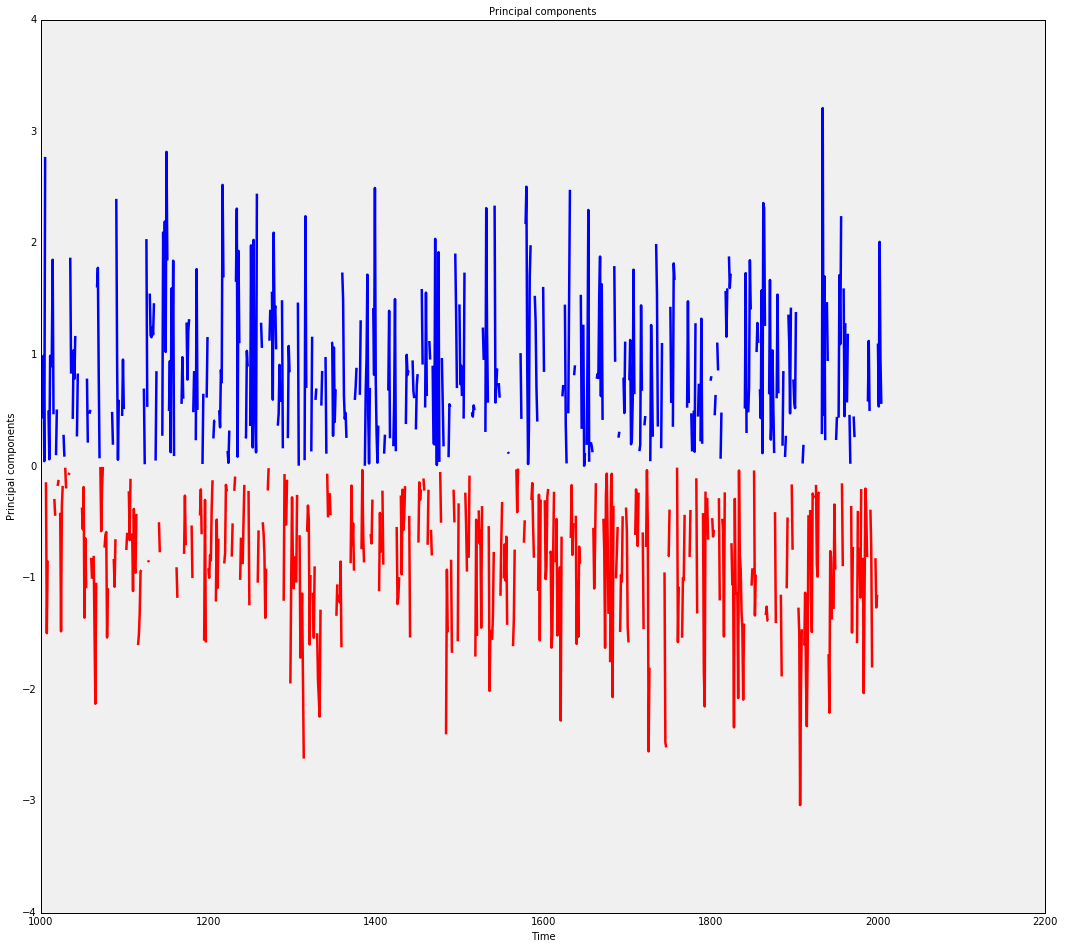

In [24]:
%matplotlib inline
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np
fig=plt.figure(figsize=(18, 16))
pcs_pos = pcs[0]
pcs_neg = pcs[0]
pcs_pos.data[pcs_pos.data<0] = np.nan
pcs_neg.data[pcs_neg.data>=0] = np.nan
qplt.plot(pcs_pos,'b')
qplt.plot(pcs_neg,'r')
qplt.show()

In [25]:
pcs_pos.data

array([        nan,  0.81264859,  0.44008833, ...,  2.01190469,
        0.95659455,  0.56003572])

In [30]:
iris_ensemble.dimcoords()

AttributeError: 'Cube' object has no attribute 'dimcoords'